In [525]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from matplotlib import font_manager #日本語

plt.rcParams['font.family'] = 'IPAPGothic'

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

### データ成形
- まずは不要なデータの削除
- encoderを使って，ダミー変数を作成

In [526]:
df = pd.read_csv("./questionnaire.csv")
df.head()

,タイムスタンプ,あなたの学部は何ですか？,並んでいる列を見て買うことを断念することはありますか？,店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？,ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？,学内ローソンでキャッシュレス決済を利用したことがありますか？,よく利用する支払い方法は以下のうちどれですか？,キャッシュレス決済を利用しない理由は何ですか？,その理由は何ですか？,あなたはクレジットカードを持っていますか？,なぜクレジットカードを持っていないのですか？（複数選択可）,デビットカードを知っていますか？
0,2018/09/27 8:45:44 午後 GMT+9,NaN,よくある,ほぼ買わない,NaN,YES.,電子マネー（交通系）,NaN,NaN,YES,NaN,はい、仕組みについても知っています。
1,2018/09/27 11:18:44 午後 GMT+9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018/09/27 11:41:13 午後 GMT+9,NaN,よくある,３割程度,NaN,YES.,バーコード決済,NaN,NaN,YES,NaN,はい、仕組みについても知っています。
3,2018/09/28 12:23:14 午前 GMT+9,NaN,よくある,ほぼ買わない,NaN,YES.,バーコード決済,NaN,NaN,YES,NaN,知っているけど、仕組みまでは分かりません。
4,2018/09/28 12:24:05 午前 GMT+9,NaN,たまにある,３割程度,NaN,NO.,NaN,1. キャッシュレス決済手段を持っていない,NaN,NO,危険だという認識があるから。,知っているけど、仕組みまでは分かりません。


#### 削除

In [527]:
# まずタイムスタンプのデータは必要ないので，削除
df = df.drop("タイムスタンプ", axis=1)

In [528]:
# NaNデータも取り除く
df = df.dropna(how='all')

In [529]:
# ここで無意味なデータを削除する
df = df.drop("キャッシュレス決済を利用しない理由は何ですか？", axis=1)
df = df.drop("その理由は何ですか？", axis=1)
df = df.drop("なぜクレジットカードを持っていないのですか？（複数選択可）", axis=1)
df = df.drop("デビットカードを知っていますか？", axis=1)

#### エンコード

In [530]:
# labelencode
# labellistの作成

# まずは学部，中教とそれ以外で分ける
df["あなたの学部は何ですか？"].unique()

array([nan, '経済学部', '国際教養学部', '法学部', '理工学部', '文学部', '看護学部', '経営学部',
       '教育学部(創価大学)', '教育学部', '短大生', '創価女子短期大学', '現代ビジネス学科'], dtype=object)

In [531]:
df = df.replace(list(df["あなたの学部は何ですか？"].unique()), [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [532]:
# ある，ないの2値にする
df["並んでいる列を見て買うことを断念することはありますか？"].unique()

array(['よくある', 'たまにある', 0, 'ない'], dtype=object)

In [533]:
df = df.replace(list(df["並んでいる列を見て買うことを断念することはありますか？"].unique()),[1, 1, 0, 0])

In [534]:
# 頻度も2値に
df["店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？"].unique()

array(['ほぼ買わない', '３割程度', '８割以上', 0, '週に3～4日', '買わない', '週に1～2日', '毎日'],
      dtype=object)

In [535]:
df = df.replace(list(df["店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？"].unique()),[0, 1, 1, 0, 1, 0, 0, 1])

In [536]:
# 有人レジ，キャッシュレス
df["ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？"].unique()

array([0, 'NO.', 'YES.'], dtype=object)

In [537]:
df = df.replace(list(df["ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？"].unique()),[0, 0, 1])

In [538]:
# クレカ持ってるか持ってないか
df["あなたはクレジットカードを持っていますか？"].unique()

array(['YES', 'NO', 0], dtype=object)

In [539]:
df = df.replace(list(df["あなたはクレジットカードを持っていますか？"].unique()),[1, 0, 0])

In [540]:
# 支払い方法
df["よく利用する支払い方法は以下のうちどれですか？"].unique()

array(['電子マネー（交通系）', 'バーコード決済', 0, '電子マネー', 'クレジットカード', 'デビットカード',
       '電子マネー（交通系）;クレジットカード;バーコード決済', '電子マネー（交通系）;クレジットカード',
       '電子マネー;電子マネー（交通系）;クレジットカード', '電子マネー（交通系）;デビットカード',
       '電子マネー;電子マネー（交通系）', 'クレジットカード;デビットカード', 'ブランドプリペイドカード',
       '電子マネー;クレジットカード',
       '電子マネー;電子マネー（交通系）;クレジットカード;JCBプレモカード;ブランドプリペイドカード;デビットカード',
       '電子マネー;クレジットカード;デビットカード', 'クレジットカード;バーコード決済', '電子マネー（交通系）;バーコード決済',
       '電子マネー;電子マネー（交通系）;クレジットカード;デビットカード', '電子マネー（交通系）;クレジットカード;デビットカード'],
      dtype=object)

In [541]:
df = df.replace(list(df["よく利用する支払い方法は以下のうちどれですか？"].unique()),[1, 2, 0, 3, 4, 5, 2, 4, 4, 5, 1, 5, 3, 4, 4, 5, 2, 2, 5, 5])

In [543]:
df2 = df

In [544]:
# 便宜上順序の入れ替え
df = df.ix[:, [0, 1, 2, 3, 4, 6, 5]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [545]:
# 種類のエンコード
l = ["よく利用する支払い方法は以下のうちどれですか？"]
# onehot encode
ohe = preprocessing.OneHotEncoder(sparse=False) 
c_ecd = ohe.fit_transform((df["よく利用する支払い方法は以下のうちどれですか？"].values).reshape(-1, 1))
c_ecd

df = df.drop("よく利用する支払い方法は以下のうちどれですか？", axis=1)

In [478]:
# 被説明変数を決める
y_index = "学内ローソンでキャッシュレス決済を利用したことがありますか？"
y = df[y_index].values
df = df.drop(y_index, axis=1)

In [479]:
# 説明変数の行結合
data = []
for i in range(len(c_ecd)):
    data.append(np.hstack([c_ecd[i], df.values[i]]))

In [480]:
# 説明変数をXに代入
X = data

In [547]:
"""
因子の対応
[NaN,
'電子マネー（交通系）',
'バーコード決済',
'電子マネー',
'クレジットカード',
'デビットカード',
'あなたの学部は何ですか？', 
'並んでいる列を見て買うことを断念することはありますか？',
'店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？',
'ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？', 
'あなたはクレジットカードを持っていますか？']
"""

"\n因子の対応\n[NaN,\n'電子マネー（交通系）',\n'バーコード決済',\n'電子マネー',\n'クレジットカード',\n'デビットカード',\n'あなたの学部は何ですか？', \n'並んでいる列を見て買うことを断念することはありますか？',\n'店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？',\n'ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？', \n'あなたはクレジットカードを持っていますか？']\n"

In [546]:
X

[array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.]),
 array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.]),
 array([0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.]),
 array([1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.]),
 array([0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.]),
 array([1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.]),
 array([0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.]),
 array([0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.]),
 array([0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.]),
 array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.]),
 array([0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.]),
 array([0., 1., 0., 0., 0., 

In [483]:
df.columns

Index(['あなたの学部は何ですか？', '並んでいる列を見て買うことを断念することはありますか？',
       '店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？',
       'ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？', 'あなたはクレジットカードを持っていますか？'],
      dtype='object')

### 主成分分析
- データが揃ったので主成分分析にかけてみる

In [491]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_sc = sc.fit_transform(X)
pca = PCA(n_components=2)
pca.fit(data_sc)

transformed = pca.fit_transform(X)

Text(0,0.5,'pc2')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


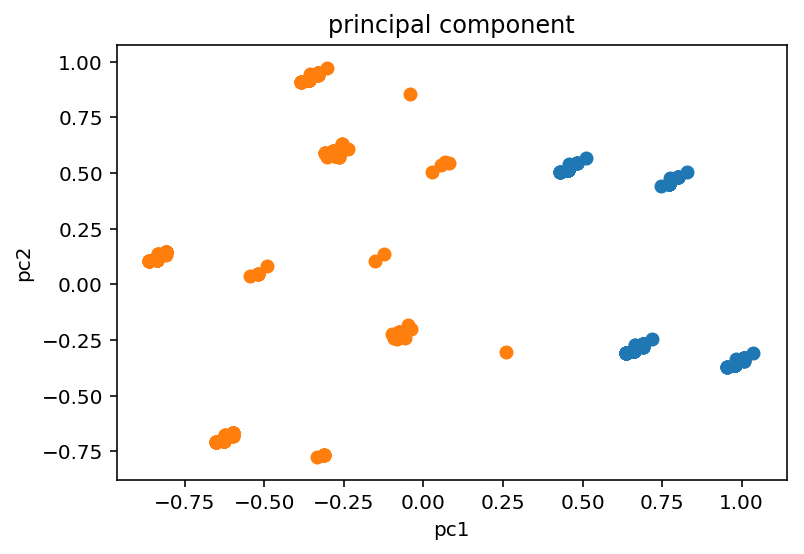

In [492]:
# 主成分をプロットする
for label in np.unique(y):
    plt.scatter(transformed[y == label, 0],
                transformed[y == label, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

- ここでは，11次元ある特徴量を，直交軸（主成分）が分散が最大となる方向となる新しい部分空間に射影している
- とにかく，特徴量から主成分をとって，新たな軸でプロットできるようになった
- グラフを見たらわかる通り，線形分離ができそう

### 因子負荷量
- 因子負荷量の計算をして，各特徴量の各主成分に対しての影響力を調べて，主成分の軸の意味を推定してみる．
- 因子負荷量 = 固有ベクトル * 対応した固有値の平方根

In [493]:
"""
因子の対応
[NaN,
'電子マネー（交通系）',
'バーコード決済',
'電子マネー',
'クレジットカード',
'デビットカード',
'あなたの学部は何ですか？', 
'並んでいる列を見て買うことを断念することはありますか？',
'店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？',
'ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？', 
'あなたはクレジットカードを持っていますか？']
"""

"\n因子の対応\n[NaN,\n'電子マネー（交通系）',\n'バーコード決済',\n'電子マネー',\n'クレジットカード',\n'デビットカード',\n'あなたの学部は何ですか？', \n'並んでいる列を見て買うことを断念することはありますか？',\n'店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？',\n'ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？', \n'あなたはクレジットカードを持っていますか？']\n"

In [516]:
label_data = ['電子マネーを使用しない',
'電子マネー（交通系）',
'バーコード決済',
'電子マネー',
'クレジットカード',
'デビットカード',
'あなたの学部は何ですか？', 
'並んでいる列を見て買うことを断念することはありますか？',
'店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？',
'ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？', 
'あなたはクレジットカードを持っていますか？']

In [517]:
pd.DataFrame(label_data)

,0
0,電子マネーを使用しない
1,電子マネー（交通系）
2,バーコード決済
3,電子マネー
4,クレジットカード
5,デビットカード
6,あなたの学部は何ですか？
7,並んでいる列を見て買うことを断念することはありますか？
8,店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？
9,ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？


- まずは固有ベクトル

In [498]:
# 各主成分に対しての固有ベクトル
com = pca.components_
com

array([[ 0.71585601, -0.57514619, -0.00439749, -0.01533904, -0.09850446,
        -0.02246882, -0.027933  , -0.02866547, -0.02487357, -0.31696171,
        -0.20882782],
       [-0.03567979, -0.43773386,  0.02582723,  0.02943563,  0.36878295,
         0.04936784, -0.034528  , -0.02137814, -0.00736716,  0.06356075,
         0.81326565]])

- 因子負荷量を算出

In [509]:
# 固有値
pca.explained_variance_

array([0.41882573, 0.29341806])

In [510]:
# 因子負荷量の算出
loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

In [504]:
# インデックスと固有ベクトルを対応させる
loading_data = pd.DataFrame({
    '特徴量': ['NaN', '電子マネー（交通系）','バーコード決済','電子マネー','クレジットカード','デビットカード','あなたの学部は何ですか？', '並んでいる列を見て買うことを断念することはありますか？','店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？','ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？', 'あなたはクレジットカードを持っていますか？']
    ,'pc1' : loading[0]
    ,'pc2' : loading[1]
})

In [511]:
loading_data

,特徴量,pc1,pc2
0,NaN,0.463279,-0.019327
1,電子マネー（交通系）,-0.372216,-0.237112
2,バーコード決済,-0.002846,0.013990
3,電子マネー,-0.009927,0.015945
4,クレジットカード,-0.063749,0.199763
5,デビットカード,-0.014541,0.026742
6,あなたの学部は何ですか？,-0.018077,-0.018703
7,並んでいる列を見て買うことを断念することはありますか？,-0.018551,-0.011580
8,店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？,-0.016097,-0.003991
9,ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？,-0.205127,0.034430


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


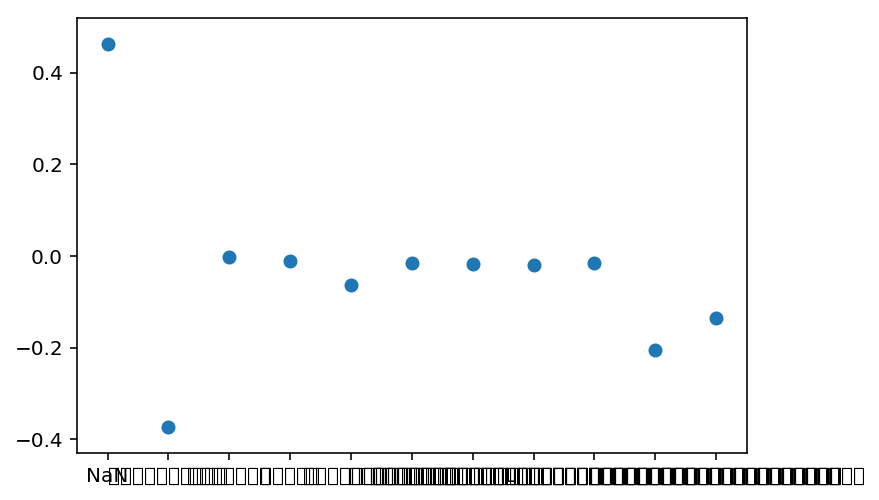

In [512]:
plt.scatter(loading_data['特徴量'], loading_data['pc1'])

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


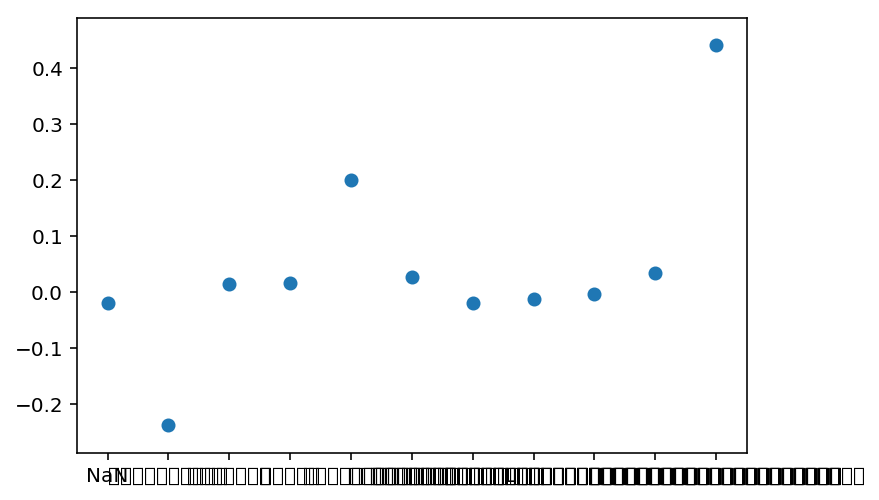

In [513]:
plt.scatter(loading_data['特徴量'], loading_data['pc2'])

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


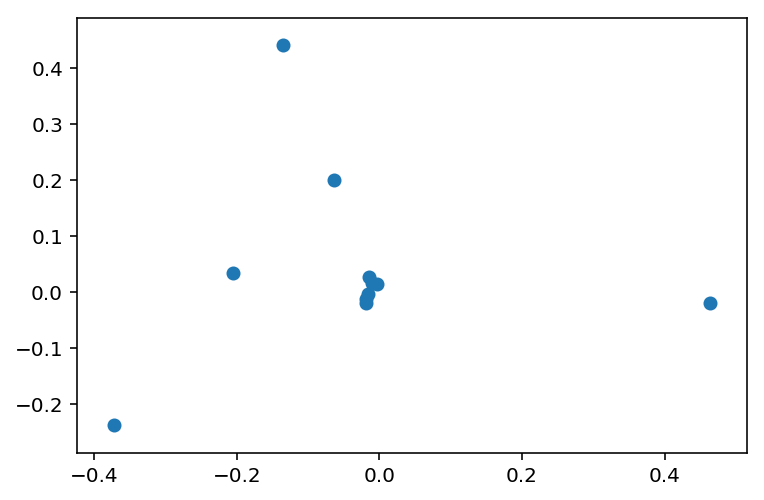

In [515]:
# 横軸が第一主成分の因子負荷量，縦軸が第二主成分の因子負荷量
plt.scatter(loading_data['pc1'], loading_data['pc2'])

- 左下のデータが，"電子マネー（交通系）": 0 or 1
    - どちらの主成分軸でも電子マネーを使う人(1)には負の重みがかかっているので，交通系の電子マネーを使うひとは，グラフの下寄りに
    
- 右下のデータが，"クレジットカードを持っているか持っていないか": 0 or 1
    - 第2主成分軸とはあまり相関がなく，第1主成分軸において，クレジットカードをもっている人に正の重みがかかる
    - つまり，グラフの右寄りに
    
- 上あたりにあるデータが，"電子マネーの中でもクレジットカードを特に使う人" : 0 or 1 ; onehot
    - 第1主成分にはさほど影響なし
    - 第2主成分において，正の重みがかかるため，上よりに．

### 主成分分析を用いて次元削減 / ロジスティック回帰

In [413]:
# プロット用関数の定義
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # マーカーとカラーマップの用意
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    #各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    # 軸の範囲の指定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

In [414]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

# Xとyを学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None )

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

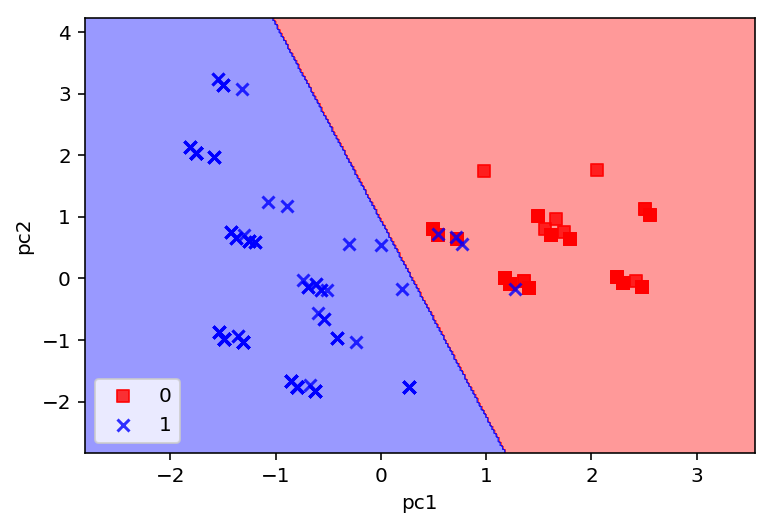

In [415]:
11

- 誤分類は見た感じ3つ
- うまく分類できるっぽいが，主成分をとっていて，軸の意味が曖昧なため説明の役には立たないか...

### SVM

In [416]:
c_ecd  # 電子マネーの種類をダミー変数を用いて表現したもの

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [417]:
from sklearn.svm import SVC

# 線形SVMのインスタンスを生成
model = SVC(kernel='linear', random_state=None)

# 説明変数をX, 被説明変数をyとする
# データの標準化
sc.fit(c_ecd)
X_svm_std = sc.transform(c_ecd)
y_svm = y

# モデルの学習。fit関数で行う。
model.fit(X_svm_std, y_svm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [418]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = model.predict(X_svm_std)
accuracy_train = accuracy_score(y_svm, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

トレーニングデータに対する正解率： 1.00


In [419]:
"""
ちなみに，電子マネーの種類は0~5の順で
NaN, '電子マネー（交通系）', 'バーコード決済', '電子マネー', 'クレジットカード', 'デビットカード',
"""

ll= []
for i in range(6):
    l = np.zeros(6)
    l[i] = 1
    ll.append(l)    

In [420]:
pred_train = model.predict(ll)
pred_train

array([0, 1, 1, 1, 1, 1])

- 電子マネーを使う人は，キャッシュレス決済を使用したことない，という結果

In [421]:
df2.head()

,あなたの学部は何ですか？,並んでいる列を見て買うことを断念することはありますか？,店員に用意してもらう商品（Lチキやカフェラテなど）をどのくらいの頻度で頼みますか？,ローソンの有人レジでもキャッシュレス決済ができることは知っていますか？,学内ローソンでキャッシュレス決済を利用したことがありますか？,よく利用する支払い方法は以下のうちどれですか？,あなたはクレジットカードを持っていますか？
0,0,1,0,0,1,1,1
2,0,1,1,0,1,2,1
3,0,1,0,0,1,2,1
4,0,1,1,0,0,0,0
7,1,1,0,0,1,1,1


In [422]:
# 被説明変数を並んでいる列を見て買うことを断念することはありますか？にしてみる
y2 = df2["並んでいる列を見て買うことを断念することはありますか？"].values
df2 = df2.drop("並んでいる列を見て買うことを断念することはありますか？", axis=1)
df2 = df2.drop("よく利用する支払い方法は以下のうちどれですか？", axis=1)
# 説明変数の行結合
data2 = []
for i in range(len(c_ecd)):
    data2.append(np.hstack([c_ecd[i], df2.values[i]]))

In [423]:
# SVM
model.fit(data2, y2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [425]:
pred_train = model.predict(data2)
accuracy_train = accuracy_score(y2, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)
print(pred_train)

トレーニングデータに対する正解率： 0.94
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [426]:
y2

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

- これがラベルだったらほぼ意味なし，